# Comprehensive Analysis of Electricity Market Dynamics: Forecasting, Clustering, and Anomaly Detection

<div style="border-left: 4px solid #4a86e8; padding-left: 20px; margin-bottom: 20px;">
<p>Welcome to this in-depth exploration of electricity market dynamics. This notebook harnesses the power of advanced data science techniques to unravel the complexities of electricity pricing, consumption patterns, and market segmentation across various sectors and states. Through a combination of <strong>time series forecasting</strong>, <strong>K-means clustering</strong>, <strong>linear regression</strong>, and <strong>anomaly detection</strong>, we aim to provide valuable insights into:</p>

<ul>
  <li>Future electricity price trends</li>
  <li>State-wise market segmentation</li>
  <li>Factors influencing residential electricity prices</li>
  <li>Unusual patterns and outliers in electricity data</li>
</ul>

<p>Join us on this analytical journey as we illuminate the intricate landscape of the electricity market, offering data-driven perspectives to inform decision-making and strategy in this vital sector.</p>
</div>

<div style="background-color: #f0f7ff; border: 2px solid #4a86e8; border-radius: 10px; padding: 15px; margin-top: 20px;">
<h3 style="color: #4a86e8; margin-top: 0;">📊 Dataset Information</h3>
<p style="margin-bottom: 0;">This notebook performs analysis on the <a href="https://www.kaggle.com/datasets/alistairking/electricity-prices" style="color: #4a86e8; font-weight: bold;">U.S. Electricity Prices</a> dataset.</p>
</div>

<div style="background-color: #f3e5f5; border-left: 5px solid #7b1fa2; padding: 20px; border-radius: 5px; margin-top: 20px;">
  <h2 style="color: #7b1fa2;">📚 Preliminaries: Importing Basic Libraries + Understanding The Data Structure</h2>

  <p>This section sets up the foundation for our analysis by importing necessary libraries and exploring the dataset structure. The process includes:</p>

  <ol style="list-style-type: none; padding-left: 0;">
    <li style="margin-bottom: 10px;"><span style="background-color: #7b1fa2; color: white; padding: 2px 6px; border-radius: 3px; margin-right: 5px;">1</span> <strong>Library imports:</strong> Loading essential Python libraries for data manipulation and analysis.</li>
    <li style="margin-bottom: 10px;"><span style="background-color: #7b1fa2; color: white; padding: 2px 6px; border-radius: 3px; margin-right: 5px;">2</span> <strong>Data loading:</strong> Reading the electricity prices dataset into our environment.</li>
    <li style="margin-bottom: 10px;"><span style="background-color: #7b1fa2; color: white; padding: 2px 6px; border-radius: 3px; margin-right: 5px;">3</span> <strong>Initial exploration:</strong> Examining the first few rows and basic information about the dataset.</li>
    <li style="margin-bottom: 10px;"><span style="background-color: #7b1fa2; color: white; padding: 2px 6px; border-radius: 3px; margin-right: 5px;">4</span> <strong>Data structure understanding:</strong> Identifying key columns and their roles in the analysis.</li>
  </ol>

  <p style="font-style: italic; margin-top: 20px; border-top: 1px solid #7b1fa2; padding-top: 10px;">For comprehensive file and column descriptions, please refer to the <a href="https://www.kaggle.com/datasets/alistairking/electricity-prices" style="color: #7b1fa2; text-decoration: none; border-bottom: 1px dotted #7b1fa2;">official dataset documentation</a>.</p>
</div>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/electricity-prices/clean_data.csv")
df = df.drop(columns=["customers"]) # this column is interesting but not relevant for this work
df.head(20)

,year,month,stateDescription,sectorName,price,revenue,sales
0,2001,1,Wyoming,all sectors,4.31,48.12840,1116.17208
1,2001,1,Wyoming,commercial,5.13,12.67978,247.08691
2,2001,1,Wyoming,industrial,3.26,19.60858,602.30484
3,2001,1,Wyoming,other,4.75,0.76868,16.17442
4,2001,1,Wyoming,residential,6.01,15.07136,250.60591
5,2001,1,New England,all sectors,10.73,1139.89520,10622.88375
6,2001,1,South Carolina,other,6.57,5.28332,80.41336
7,2001,1,South Carolina,residential,7.36,225.81673,3066.25911
8,2001,1,South Dakota,all sectors,5.85,46.98518,803.24177
9,2001,1,South Dakota,commercial,5.95,15.92044,267.66283


<div style="background-color: #f8f9fa; border-left: 5px solid #007bff; padding: 20px; border-radius: 5px;">
  <h2 style="color: #007bff;">📈 Time Series Analysis and Forecasting with ARIMA</h2>

  <p>This section implements an <a href="https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average" style="color: #007bff; text-decoration: none; border-bottom: 1px dotted #007bff;">ARIMA (AutoRegressive Integrated Moving Average)</a> model to forecast electricity prices in Wyoming. The process includes:</p>

  <ol style="list-style-type: none; padding-left: 0;">
    <li style="margin-bottom: 10px;"><span style="background-color: #007bff; color: white; padding: 2px 6px; border-radius: 3px; margin-right: 5px;">1</span> <strong>Data preparation:</strong> Converting date columns and focusing on 'all sectors' data for Wyoming.</li>
    <li style="margin-bottom: 10px;"><span style="background-color: #007bff; color: white; padding: 2px 6px; border-radius: 3px; margin-right: 5px;">2</span> <strong>Time series setup:</strong> Creating a proper <code style="background-color: #e9ecef; padding: 2px 4px; border-radius: 3px;">DatetimeIndex</code> with monthly frequency.</li>
    <li style="margin-bottom: 10px;"><span style="background-color: #007bff; color: white; padding: 2px 6px; border-radius: 3px; margin-right: 5px;">3</span> <strong>Train-test split:</strong> Dividing data into training (up to 2020) and test (2021 onwards) sets.</li>
    <li style="margin-bottom: 10px;"><span style="background-color: #007bff; color: white; padding: 2px 6px; border-radius: 3px; margin-right: 5px;">4</span> <strong>ARIMA modeling:</strong> Fitting an ARIMA(1,1,1) model on the training data.</li>
    <li style="margin-bottom: 10px;"><span style="background-color: #007bff; color: white; padding: 2px 6px; border-radius: 3px; margin-right: 5px;">5</span> <strong>Forecasting:</strong> Predicting prices for the test period.</li>
    <li style="margin-bottom: 10px;"><span style="background-color: #007bff; color: white; padding: 2px 6px; border-radius: 3px; margin-right: 5px;">6</span> <strong>Evaluation:</strong> Calculating Root Mean Squared Error (RMSE) to assess model performance.</li>
    <li style="margin-bottom: 10px;"><span style="background-color: #007bff; color: white; padding: 2px 6px; border-radius: 3px; margin-right: 5px;">7</span> <strong>Visualization:</strong> Plotting training data, actual test data, and predictions.</li>
    <li style="margin-bottom: 10px;"><span style="background-color: #007bff; color: white; padding: 2px 6px; border-radius: 3px; margin-right: 5px;">8</span> <strong>Model summary:</strong> Printing detailed ARIMA model statistics.</li>
  </ol>

  <p style="font-style: italic; margin-top: 20px; border-top: 1px solid #007bff; padding-top: 10px;">This analysis provides insights into the trend and future projections of electricity prices in Wyoming.</p>
</div>

In [3]:
# Import relevant libraries for this analysis
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [4]:
# Prepare the data for time series analysis
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2) + '-01')
df = df.sort_values('date')

# Focus on 'all sectors' data for simplicity
all_sectors_data = df[(df['sectorName'] == 'all sectors') & (df['stateDescription'] == 'Wyoming')]

# Create a DatetimeIndex with explicit frequency
all_sectors_data = all_sectors_data.set_index(pd.DatetimeIndex(all_sectors_data['date']).to_period('M').to_timestamp('M'))
all_sectors_data = all_sectors_data['price']

# Split the data into train and test sets
train_data = all_sectors_data[:'2020-12-31']
test_data = all_sectors_data['2021-01-01':]

In [5]:
# Fit ARIMA model
model = ARIMA(train_data, order=(1,1,1))
results = model.fit()

# Make predictions
predictions = results.forecast(steps=len(test_data))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data, predictions))

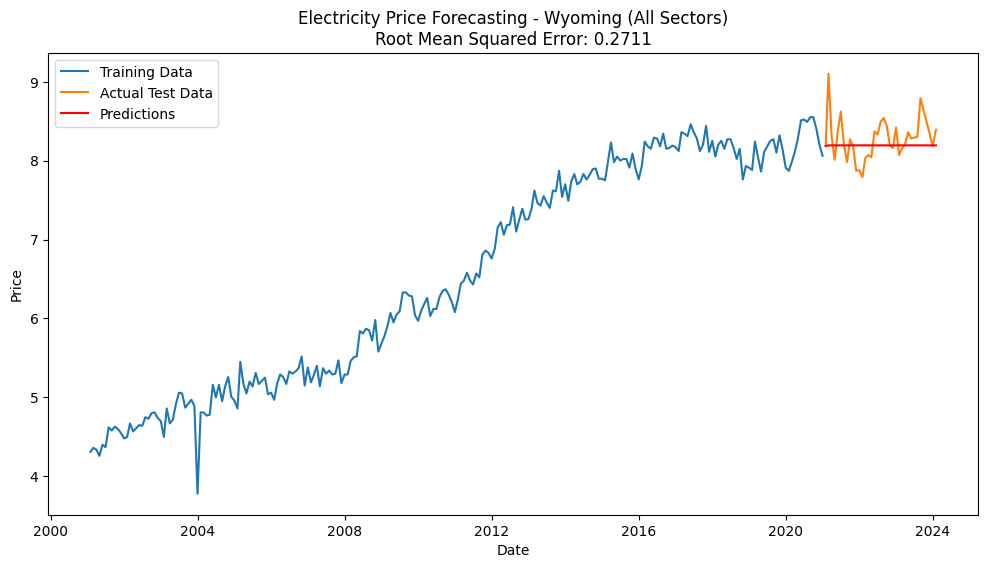

In [6]:
# Plot the results
plt.figure(figsize=(12,6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Test Data')
plt.plot(test_data.index, predictions, label='Predictions', color='red')
plt.title(f'Electricity Price Forecasting - Wyoming (All Sectors)\nRoot Mean Squared Error: {rmse:.4f}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [7]:
# Print model summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  240
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  89.500
Date:                Tue, 25 Jun 2024   AIC                           -173.001
Time:                        19:05:12   BIC                           -162.572
Sample:                    01-31-2001   HQIC                          -168.798
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0656      0.150      0.438      0.661      -0.228       0.359
ma.L1         -0.5147      0.144     -3.581      0.000      -0.796      -0.233
sigma2         0.0277      0.001     24.675      0.0

<div style="background-color: #fff3e0; border-left: 5px solid #ff9800; padding: 20px; border-radius: 5px; margin-top: 20px;">
  <h3 style="color: #ff9800;">🔍 Clustering Analysis</h3>

  <p>This section performs a <a href="https://en.wikipedia.org/wiki/K-means_clustering" style="color: #ff9800; text-decoration: none; border-bottom: 1px dotted #ff9800;">𝑘-means clustering analysis</a> on electricity data across different states and sectors. The process includes:</p>

  <ol style="list-style-type: none; padding-left: 0;">
    <li style="margin-bottom: 10px;"><span style="background-color: #ff9800; color: white; padding: 2px 6px; border-radius: 3px; margin-right: 5px;">1</span> <strong>Data preparation:</strong> Grouping data by state and sector, focusing on average price and total sales.</li>
    <li style="margin-bottom: 10px;"><span style="background-color: #ff9800; color: white; padding: 2px 6px; border-radius: 3px; margin-right: 5px;">2</span> <strong>Feature engineering:</strong> Creating a new dataframe with flattened column names for each sector and feature combination.</li>
    <li style="margin-bottom: 10px;"><span style="background-color: #ff9800; color: white; padding: 2px 6px; border-radius: 3px; margin-right: 5px;">3</span> <strong>Data normalization:</strong> Using <code style="background-color: #fff3e0; padding: 2px 4px; border-radius: 3px; border: 1px solid #ff9800;">StandardScaler</code> to normalize the features.</li>
    <li style="margin-bottom: 10px;"><span style="background-color: #ff9800; color: white; padding: 2px 6px; border-radius: 3px; margin-right: 5px;">4</span> <strong>𝑘-means clustering:</strong> Applying 𝑘-means algorithm with 5 clusters (adjustable).</li>
    <li style="margin-bottom: 10px;"><span style="background-color: #ff9800; color: white; padding: 2px 6px; border-radius: 3px; margin-right: 5px;">5</span> <strong>Visualization:</strong>
      <ul style="list-style-type: none; padding-left: 20px; margin-top: 5px;">
        <li style="margin-bottom: 5px;">📊 <strong>Scatter plot:</strong> Showing states clustered based on residential vs. industrial electricity prices.</li>
        <li style="margin-bottom: 5px;">🔥 <strong>Heatmap:</strong> Displaying cluster centroids to understand characteristic features of each cluster.</li>
      </ul>
    </li>
  </ol>

  <p style="font-style: italic; margin-top: 20px; border-top: 1px solid #ff9800; padding-top: 10px;">This analysis helps identify patterns and groupings among states based on their electricity pricing and consumption across different sectors.</p>
</div>

In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [9]:
# Prepare the data for clustering
# We'll use average price and total sales for each sector as features
features = ['price', 'sales']
sectors = ['residential', 'commercial', 'industrial']

# Create a new dataframe with the features we want
cluster_data = df.groupby(['stateDescription', 'sectorName'])[features].mean().unstack()

# Flatten column names
cluster_data.columns = [f'{col[1]}_{col[0]}' for col in cluster_data.columns]

# Print column names to verify
print("Column names:", cluster_data.columns)

# Normalize the data
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Perform K-means clustering
n_clusters = 5  # You can adjust this number
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(cluster_data_scaled)

# Add cluster labels to the dataframe
cluster_data['Cluster'] = cluster_labels

Column names: Index(['all sectors_price', 'commercial_price', 'industrial_price',
       'other_price', 'residential_price', 'transportation_price',
       'all sectors_sales', 'commercial_sales', 'industrial_sales',
       'other_sales', 'residential_sales', 'transportation_sales'],
      dtype='object')


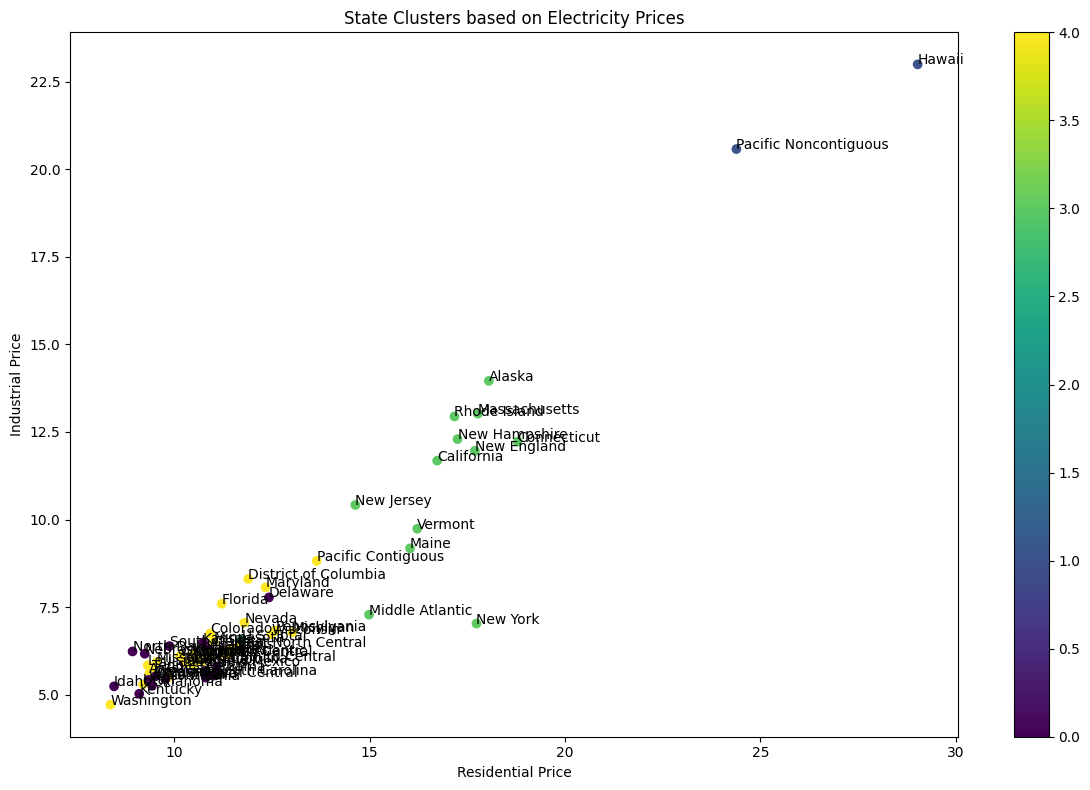

In [10]:
# Visualize the clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(cluster_data['residential_price'], 
                      cluster_data['industrial_price'], 
                      c=cluster_data['Cluster'], 
                      cmap='viridis')
plt.xlabel('Residential Price')
plt.ylabel('Industrial Price')
plt.title('State Clusters based on Electricity Prices')
plt.colorbar(scatter)

for i, state in enumerate(cluster_data.index):
    plt.annotate(state, (cluster_data['residential_price'].iloc[i], cluster_data['industrial_price'].iloc[i]))

plt.tight_layout()
plt.show()


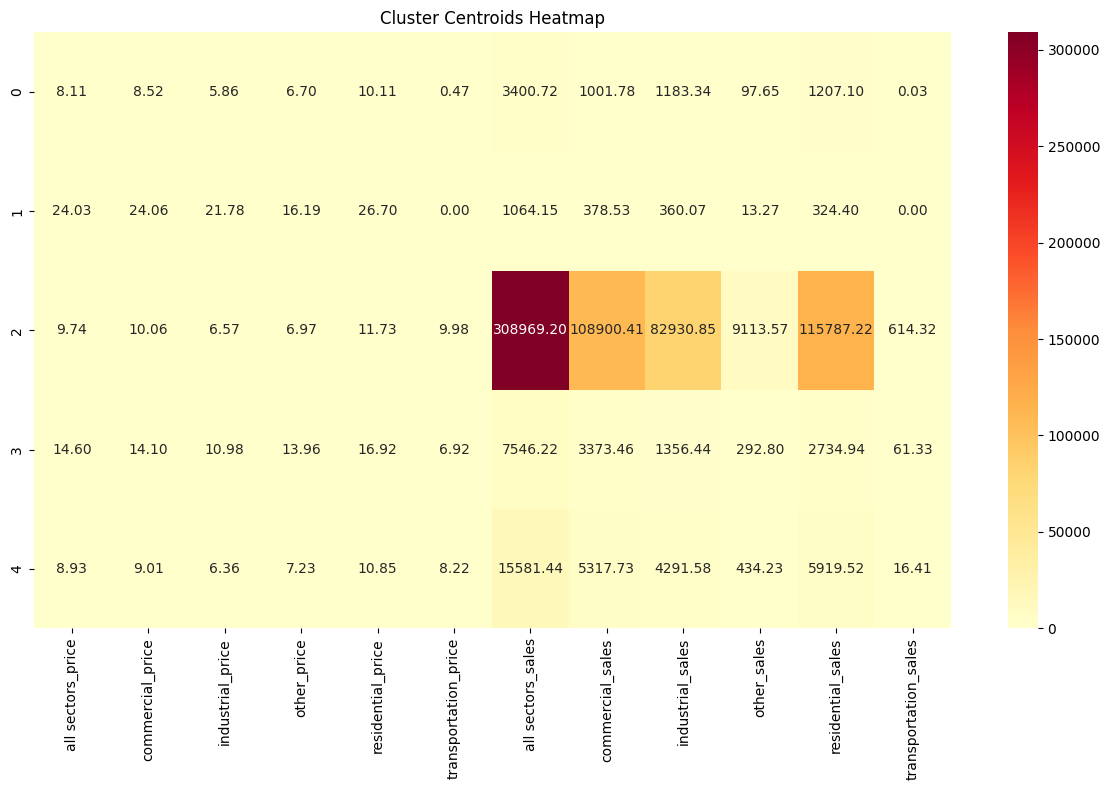

In [11]:
# Calculate and print cluster centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=cluster_data.columns[:-1])

# Heatmap of cluster centroids
plt.figure(figsize=(12, 8))
sns.heatmap(centroid_df, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Cluster Centroids Heatmap')
plt.tight_layout()
plt.show()

<div style="background-color: #e8f5e9; border-left: 5px solid #4caf50; padding: 20px; border-radius: 5px; margin-top: 20px;">
  <h2 style="color: #4caf50;">📊 Regression Analysis</h2>

  <p>This section implements a linear regression model to predict residential electricity prices. The process includes:</p>

  <ol style="list-style-type: none; padding-left: 0;">
    <li style="margin-bottom: 10px;"><span style="background-color: #4caf50; color: white; padding: 2px 6px; border-radius: 3px; margin-right: 5px;">1</span> <strong>Data preparation:</strong> Focusing on residential sector data and creating relevant features.</li>
    <li style="margin-bottom: 10px;"><span style="background-color: #4caf50; color: white; padding: 2px 6px; border-radius: 3px; margin-right: 5px;">2</span> <strong>Feature engineering:</strong> Adding month and summer season indicators.</li>
    <li style="margin-bottom: 10px;"><span style="background-color: #4caf50; color: white; padding: 2px 6px; border-radius: 3px; margin-right: 5px;">3</span> <strong>Data splitting:</strong> Dividing into training and testing sets.</li>
    <li style="margin-bottom: 10px;"><span style="background-color: #4caf50; color: white; padding: 2px 6px; border-radius: 3px; margin-right: 5px;">4</span> <strong>Feature scaling:</strong> Normalizing features using <code style="background-color: #e8f5e9; padding: 2px 4px; border-radius: 3px; border: 1px solid #4caf50;">StandardScaler</code>.</li>
    <li style="margin-bottom: 10px;"><span style="background-color: #4caf50; color: white; padding: 2px 6px; border-radius: 3px; margin-right: 5px;">5</span> <strong>Model training:</strong> Fitting a <code style="background-color: #e8f5e9; padding: 2px 4px; border-radius: 3px; border: 1px solid #4caf50;">LinearRegression</code> model.</li>
    <li style="margin-bottom: 10px;"><span style="background-color: #4caf50; color: white; padding: 2px 6px; border-radius: 3px; margin-right: 5px;">6</span> <strong>Prediction and evaluation:</strong> Calculating Mean Squared Error and R-squared score.</li>
    <li style="margin-bottom: 10px;"><span style="background-color: #4caf50; color: white; padding: 2px 6px; border-radius: 3px; margin-right: 5px;">7</span> <strong>Model interpretation:</strong> Examining feature coefficients for importance.</li>
    <li style="margin-bottom: 10px;"><span style="background-color: #4caf50; color: white; padding: 2px 6px; border-radius: 3px; margin-right: 5px;">8</span> <strong>Visualizations:</strong>
      <ul style="list-style-type: none; padding-left: 20px; margin-top: 5px;">
        <li style="margin-bottom: 5px;">📈 <strong>Actual vs. Predicted prices scatter plot</strong></li>
        <li style="margin-bottom: 5px;">📊 <strong>Feature importance bar plot</strong></li>
        <li style="margin-bottom: 5px;">🔍 <strong>Residual plot for model diagnostics</strong></li>
      </ul>
    </li>
  </ol>

  <p style="font-style: italic; margin-top: 20px; border-top: 1px solid #4caf50; padding-top: 10px;">This analysis provides insights into factors influencing residential electricity prices and assesses the model's predictive performance.</p>
</div>

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
# Prepare the data for regression
# We'll focus on predicting residential prices
residential_data = df[df['sectorName'] == 'residential'].copy()

# Create features
residential_data['month'] = pd.to_datetime(residential_data['year'].astype(str) + '-' + residential_data['month'].astype(str).str.zfill(2) + '-01').dt.month
residential_data['is_summer'] = residential_data['month'].isin([6, 7, 8]).astype(int)

# Select features for the model
features = ['year', 'month', 'is_summer', 'sales', 'revenue']
target = 'price'

X = residential_data[features]
y = residential_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")

# Print coefficients
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print("\nModel Coefficients:")
print(coef_df)

Mean Squared Error: 16.6580
R-squared Score: 0.2425

Model Coefficients:
     Feature  Coefficient
0       year     2.000241
1      month     0.131867
2  is_summer     0.168624
3      sales    -4.284047
4    revenue     4.117484


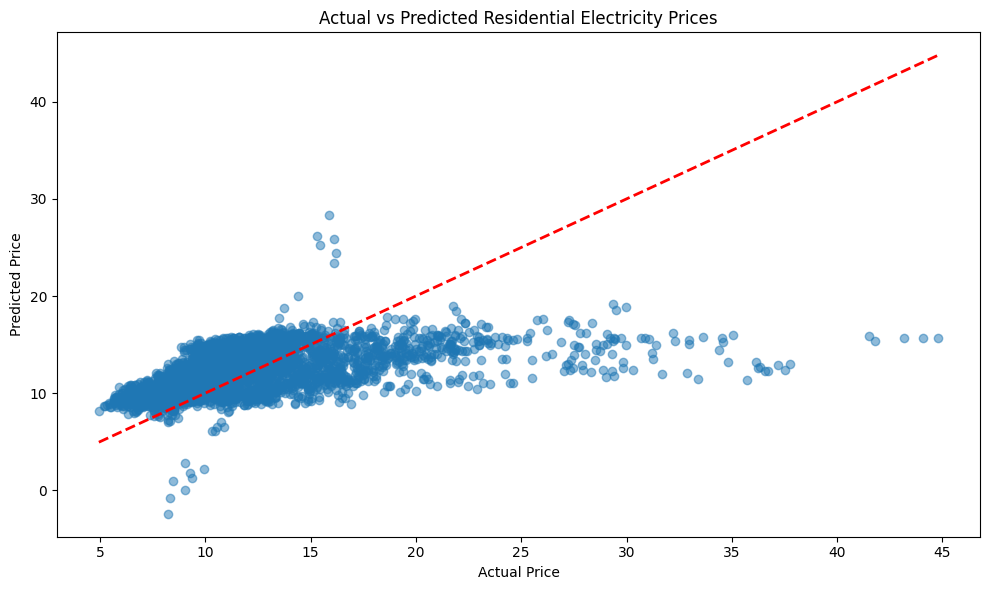

In [15]:
# Visualize actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Residential Electricity Prices")
plt.tight_layout()
plt.show()

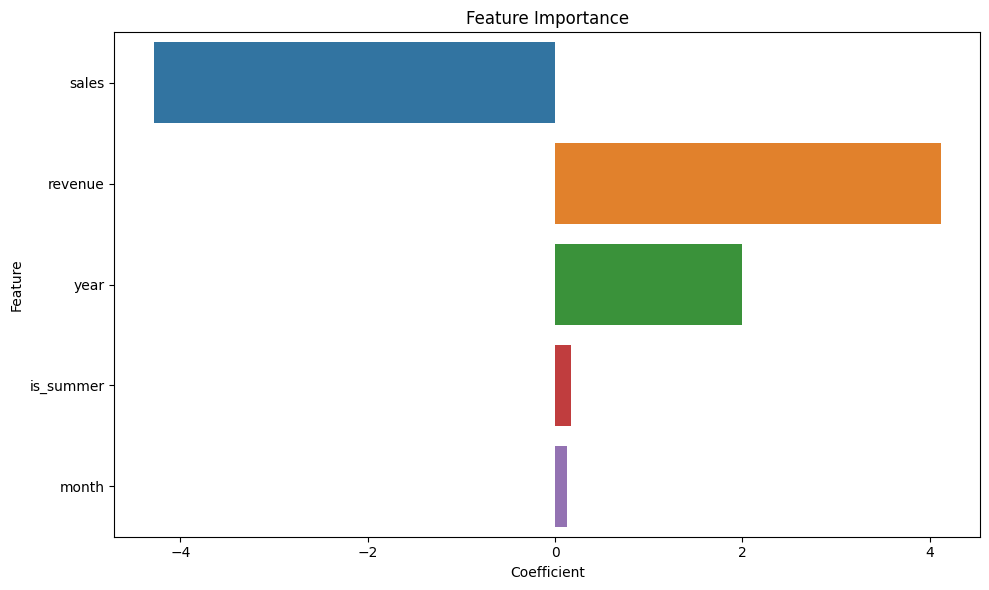

In [16]:
# Feature importance plot
plt.figure(figsize=(10, 6))
coef_df = coef_df.sort_values('Coefficient', key=abs, ascending=False)
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

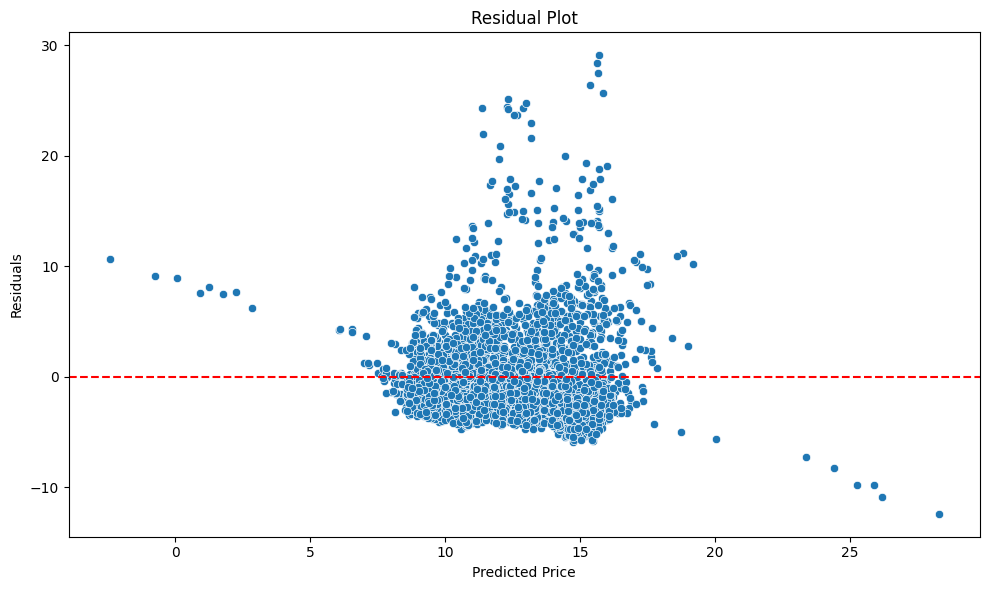

In [17]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.tight_layout()
plt.show()

<div style="background-color: #fff0f5; border-left: 5px solid #dc3545; padding: 20px; border-radius: 5px; margin-top: 20px;">
  <h2 style="color: #dc3545;">🔍 Anomaly Detection</h2>

  <p>This section implements an anomaly detection process for the electricity dataset across different sectors. The approach includes:</p>

  <ol style="list-style-type: none; padding-left: 0;">
    <li style="margin-bottom: 10px;"><span style="background-color: #dc3545; color: white; padding: 2px 6px; border-radius: 3px; margin-right: 5px;">1</span> <strong>Custom anomaly detection function:</strong> Using <a href="https://en.wikipedia.org/wiki/Standard_score" style="color: #dc3545; text-decoration: none; border-bottom: 1px dotted #dc3545;">z-scores</a> to identify outliers.</li>
    <li style="margin-bottom: 10px;"><span style="background-color: #dc3545; color: white; padding: 2px 6px; border-radius: 3px; margin-right: 5px;">2</span> <strong>Sector-wise analysis:</strong> Applying the detection method to each unique sector in the dataset.</li>
    <li style="margin-bottom: 10px;"><span style="background-color: #dc3545; color: white; padding: 2px 6px; border-radius: 3px; margin-right: 5px;">3</span> <strong>Multi-feature examination:</strong> Detecting anomalies in price, revenue, and sales.</li>
    <li style="margin-bottom: 10px;"><span style="background-color: #dc3545; color: white; padding: 2px 6px; border-radius: 3px; margin-right: 5px;">4</span> <strong>Data aggregation:</strong> Combining anomalies from different features for each sector.</li>
    <li style="margin-bottom: 10px;"><span style="background-color: #dc3545; color: white; padding: 2px 6px; border-radius: 3px; margin-right: 5px;">5</span> <strong>Visualization:</strong>
      <ul style="list-style-type: none; padding-left: 20px; margin-top: 5px;">
        <li style="margin-bottom: 5px;">📊 Scatter plots for each sector showing regular data points and detected anomalies.</li>
        <li style="margin-bottom: 5px;">📅 X-axis represents the year, Y-axis shows the price.</li>
        <li style="margin-bottom: 5px;">🔴 Anomalies highlighted in red for easy identification.</li>
      </ul>
    </li>
  </ol>

  <p style="font-style: italic; margin-top: 20px; border-top: 1px solid #dc3545; padding-top: 10px;">This analysis helps identify unusual patterns or outliers in electricity pricing and consumption across different sectors over time, which could indicate significant events or data issues requiring further investigation.</p>
</div>

In [18]:
from scipy import stats

In [19]:
def detect_anomalies(group, column, threshold=3):
    z_scores = np.abs(stats.zscore(group[column]))
    return group[z_scores > threshold]

# Perform anomaly detection for each sector and each numeric column
numeric_columns = ['price', 'revenue', 'sales']
anomalies = {}

for sector in df['sectorName'].unique():
    sector_data = df[df['sectorName'] == sector]
    sector_anomalies = pd.DataFrame()
    
    for column in numeric_columns:
        column_anomalies = detect_anomalies(sector_data, column)
        sector_anomalies = pd.concat([sector_anomalies, column_anomalies])
    
    anomalies[sector] = sector_anomalies.drop_duplicates()

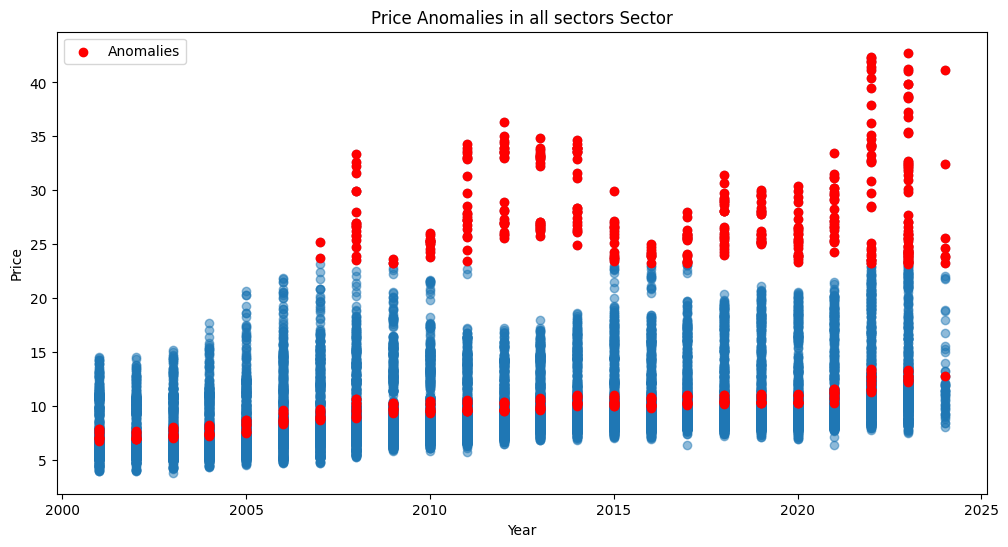

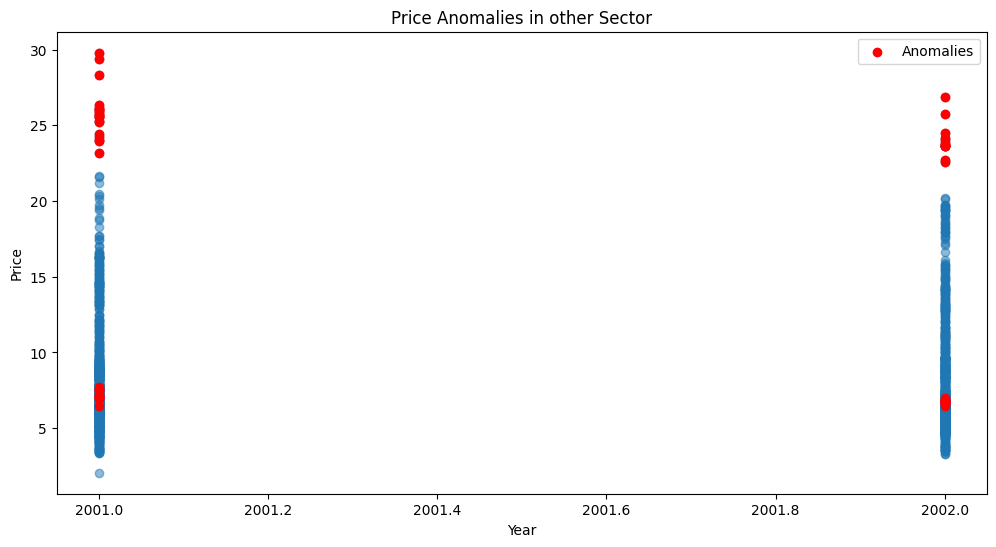

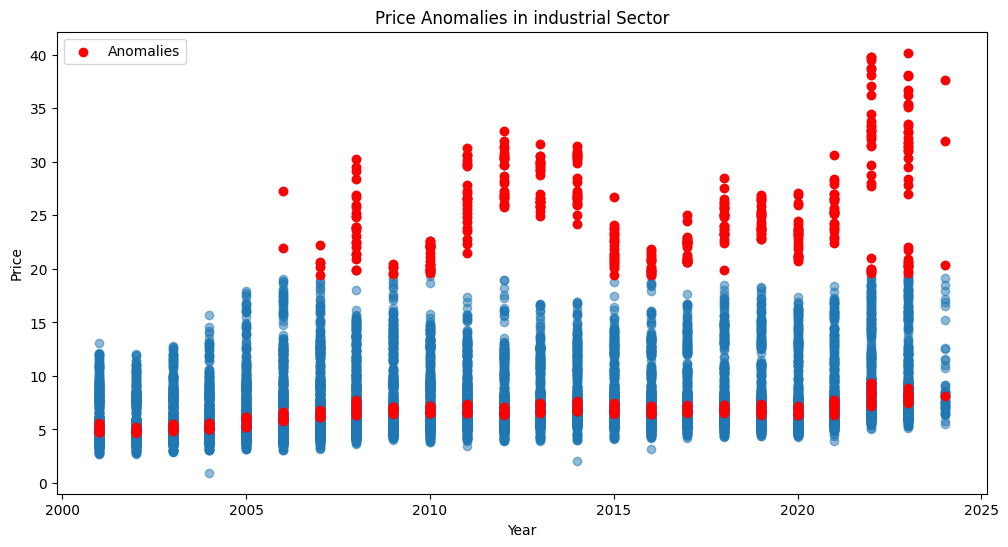

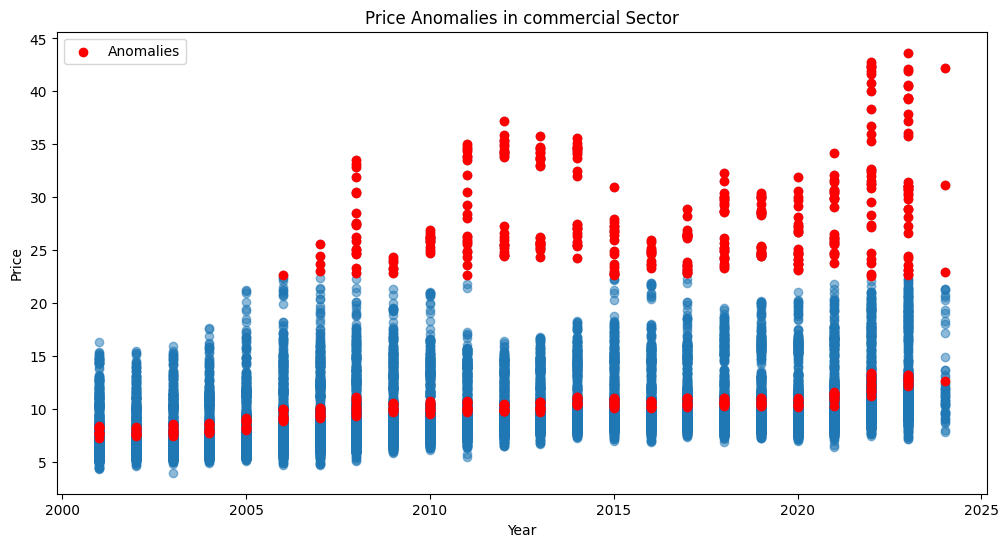

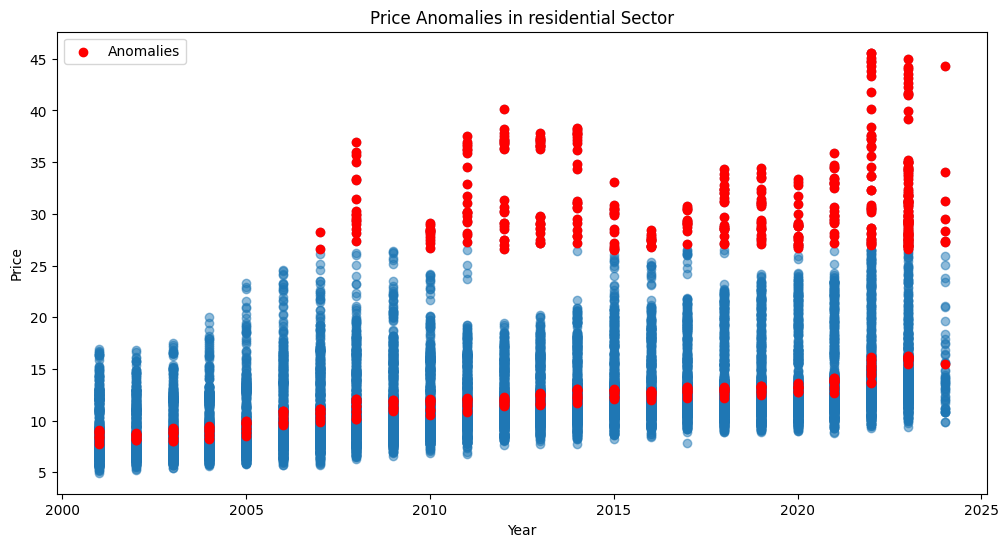

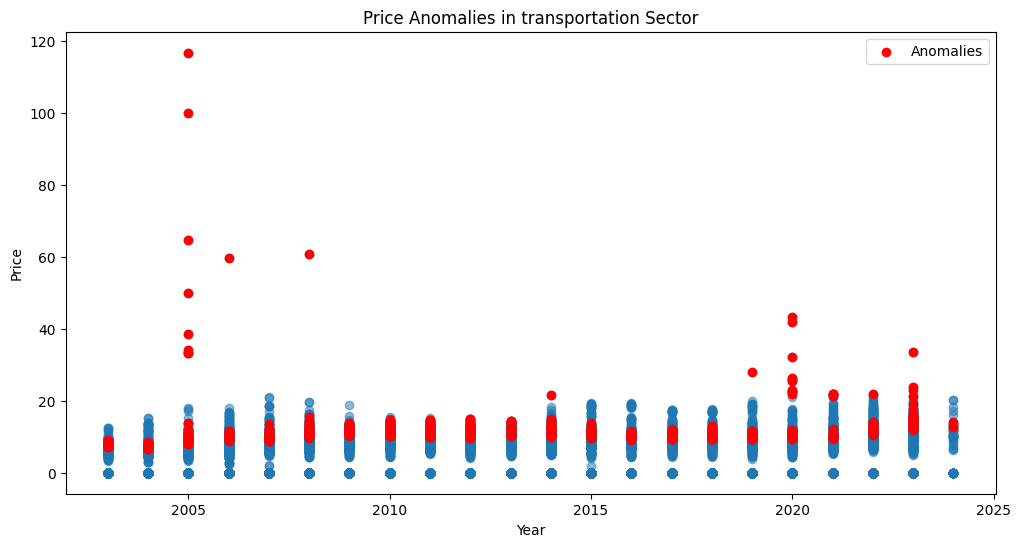

In [20]:
# Visualize anomalies
for sector in df['sectorName'].unique():
    plt.figure(figsize=(12, 6))
    plt.scatter(df[df['sectorName'] == sector]['year'], df[df['sectorName'] == sector]['price'], alpha=0.5)
    plt.scatter(anomalies[sector]['year'], anomalies[sector]['price'], color='red', label='Anomalies')
    plt.title(f'Price Anomalies in {sector} Sector')
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

<div style="background-color: #e8f5e9; border: 2px solid #4caf50; border-radius: 10px; padding: 20px; margin-top: 20px;">
  <h3 style="color: #4caf50; margin-top: 0; display: flex; align-items: center;">
    <span style="font-size: 24px; margin-right: 10px;">💡</span>
    Feedback and Suggestions
  </h3>
  <p style="margin-bottom: 15px;">We welcome your feedback and suggestions! If you have any ideas for improving this analysis or additional aspects you'd like to see explored, please don't hesitate to reach out. Your input is valuable in enhancing the quality and relevance of this work.</p>
  <ul style="list-style-type: none; padding-left: 0;">
    <li style="margin-bottom: 10px;">
      <span style="color: #4caf50; font-weight: bold;">📊 Dataset Discussions:</span> 
      <a href="https://www.kaggle.com/datasets/alistairking/electricity-prices/discussion?sort=published" style="color: #4caf50; text-decoration: none; border-bottom: 1px dotted #4caf50;">"U.S. Electricity Prices" Dataset Discussion</a>
    </li>
    <li style="margin-bottom: 10px;">
      <span style="color: #4caf50; font-weight: bold;">💼 Dataset Suggestions:</span> 
      <a href="https://www.kaggle.com/datasets/alistairking/electricity-prices/suggestions" style="color: #4caf50; text-decoration: none; border-bottom: 1px dotted #4caf50;">"U.S. Electricity Prices" Dataset Suggestions</a>
    </li>
    <li style="margin-bottom: 10px;">
      <span style="color: #4caf50; font-weight: bold;">💻 Code Comments:</span> 
      <a href="https://www.kaggle.com/code/alistairking/ml-based-analysis-of-u-s-electricity-prices/comments" style="color: #4caf50; text-decoration: none; border-bottom: 1px dotted #4caf50;">"ML-based Analysis Of U.S. Electricity Prices" Code Comments</a>
    </li>
  </ul>
</div>

<div style="background-color: #f8f9fa; border: 2px solid #6c757d; border-radius: 10px; padding: 15px; margin-top: 30px; text-align: center;">
  <h2 style="color: #6c757d; margin-top: 0;">
    <span style="display: inline-block; background-color: #6c757d; color: white; width: 30px; height: 30px; line-height: 30px; border-radius: 50%; margin-right: 10px;">📝</span>
    Credits
  </h2>
  <p style="font-style: italic; margin-bottom: 0;">
    For credits & acknowledgements, please refer to the
    <a href="https://www.kaggle.com/datasets/alistairking/electricity-prices" style="color: #007bff; text-decoration: none; border-bottom: 1px dotted #007bff; font-weight: bold;">
      dataset description on Kaggle
    </a>
  </p>
</div>